## Plotting albedo values in one plot

Here you learn how to plot the albedo of two different days in one plot

First, some packages:

In [1]:
# These packages are necessary later on. Load all the packages in one place for consistency
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import datetime

Read a data file and calculate albedos for all the data

In [3]:
#The path of the directory where all AMF data are
path_dir = Path.cwd()/'data'/'1'
name_of_site = 'CA-Obs_clean.csv.gz'
path_data = path_dir/name_of_site
path_data.resolve()
df_data = pd.read_csv(path_data, index_col='time',parse_dates=['time'])
ser_alb=df_data['SWOUT']/df_data['SWIN']

Plot the albedo of one day

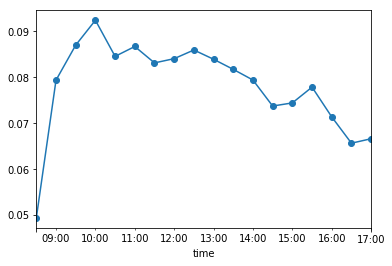

In [4]:
date1 = '2001 10 27'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].plot(marker='o')

And another day

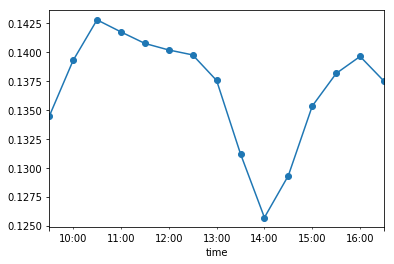

In [5]:
date2 = '2001 11 21'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2].plot(marker='o')

Plot the albedo of both days on one plot using the previous methods

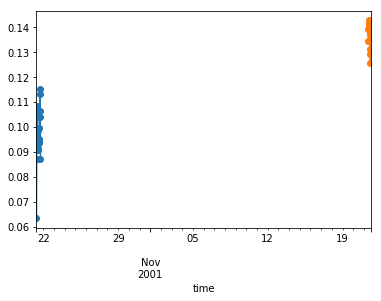

In [6]:
date1 = '2001 10 21'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].plot(marker='o')
date2 = '2001 11 21'
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2].plot(marker='o')

As the days are different, we do not get a good plot. 

To fix this we need to find the time of the day each data point is associated with. For example, for date1, we use the time index  from `Dataframe.index.time` :

In [11]:
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].index.time

array([datetime.time(8, 30), datetime.time(9, 0), datetime.time(9, 30),
       datetime.time(10, 0), datetime.time(10, 30), datetime.time(11, 0),
       datetime.time(11, 30), datetime.time(12, 0), datetime.time(12, 30),
       datetime.time(13, 0), datetime.time(13, 30), datetime.time(14, 0),
       datetime.time(14, 30), datetime.time(15, 0), datetime.time(15, 30),
       datetime.time(16, 0), datetime.time(16, 30), datetime.time(17, 0),
       datetime.time(17, 30)], dtype=object)

Lets do this for both dates

In [12]:
X1=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1].index.time
X2=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2].index.time
Y1=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date1]
Y2=ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date2]


Now plot them in one figure

Text(0, 0.5, 'albedo')

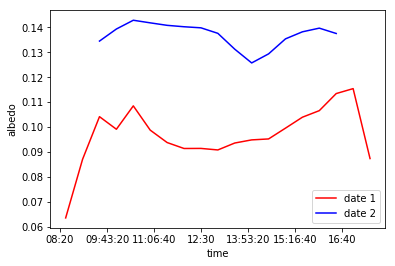

In [13]:
plt.plot(X1,Y1,'r',label='date 1')
plt.plot(X2,Y2,'b',label='date 2')
plt.legend()
plt.ylabel('albedo')

Much better! But the xticks are a little messy. We fix this by:

([<matplotlib.axis.XTick at 0x1f958b0cfd0>,
 <a list of 4 Text xticklabel objects>)

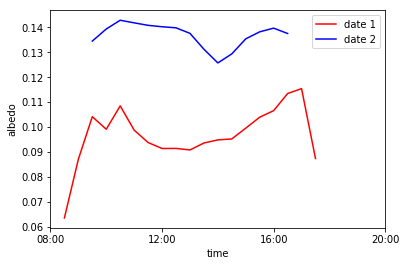

In [14]:
plt.plot(X1,Y1,'r',label='date 1')
plt.plot(X2,Y2,'b',label='date 2')
plt.legend()
plt.ylabel('albedo')
plt.xticks([datetime.time(x, 0) for x in [8,12,16,20]])